<a href="https://colab.research.google.com/github/nshaganti/nshaganti-personalizing-discounts-lp/blob/main/Analysis_Code_Personalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/nshaganti/nshaganti-personalizing-discounts-lp.git

Cloning into 'nshaganti-personalizing-discounts-lp'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 10 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 621.97 KiB | 3.14 MiB/s, done.


In [2]:
import os
repo = 'nshaganti-personalizing-discounts-lp'
if os.getcwd().split("/")[-1] == repo:
  print("Already in the correct directory")
else:
  os.chdir(repo)
  print(f"Changed working directory to: {repo}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import graphviz as gr

warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Changed working directory to: nshaganti-personalizing-discounts-lp


In [3]:
train = pd.read_csv("non_rand_discount.csv", delimiter=";")
test = pd.read_csv("random_data.csv")

In [4]:
train.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


In [5]:
test.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,age,gender,cust_state,tenure,profit
0,0,0,0,0,0,0.0,25,50.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1503.22,20.0,35,1.0,MA,23,55.16
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,5.0,5.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1798.30,60.0,29,1.0,MG,18,29.92
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1122.97,0.0,30,1.0,RJ,20,56.15
3,10,15,0,25,10,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,15,25,95.0,10.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1217.08,10.0,32,0.0,BA,20,50.85
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,966.58,0.0,30,0.0,PB,22,48.33


In [6]:
# understand the inferred data types
test.dtypes

,0
spend_1m_baby,int64
spend_2m_baby,int64
spend_3m_baby,int64
spend_4m_baby,int64
spend_5m_baby,int64
spend_6m_baby,float64
spend_1m_clothes,int64
spend_2m_clothes,float64
spend_3m_clothes,float64
spend_4m_clothes,float64


In [7]:
train["discount"] = (train["discount"].str.split(" ").str[-1]).astype(float)

In [8]:
# check for any missing data
test.isna().sum()

,0
spend_1m_baby,0
spend_2m_baby,0
spend_3m_baby,0
spend_4m_baby,0
spend_5m_baby,0
spend_6m_baby,0
spend_1m_clothes,0
spend_2m_clothes,0
spend_3m_clothes,0
spend_4m_clothes,0


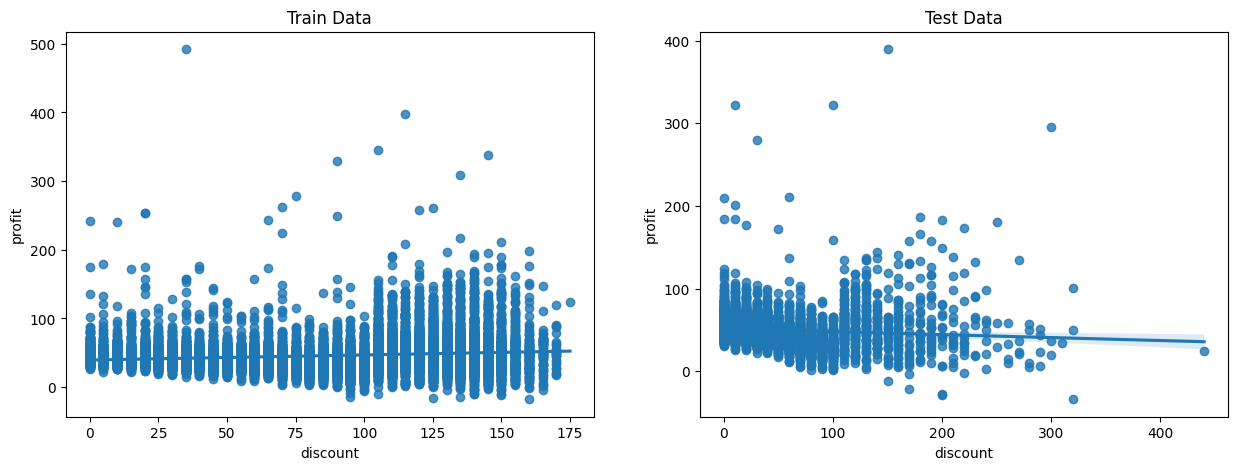

In [9]:
# prompt: Use Seaborn  to plot the relationship between discount and profits in train and test.

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(x='discount', y='profit', data=train, ax=axes[0])
axes[0].set_title('Train Data')

sns.regplot(x='discount', y='profit', data=test, ax=axes[1])
axes[1].set_title('Test Data')

plt.show()

In [10]:
def elast(df, x, y):
  return np.cov(df[x], df[y])[0, 1] / np.var(df[x])

In [11]:
print("ATE: discount on sales:", elast(test, "discount", "sales"))
print("ATE: discount on profit:", elast(test, "discount", "profit"))

ATE: discount on sales: 19.290623540734966
ATE: discount on profit: -0.035668260359428515


In [12]:
print("Association: discount on sales:", elast(train, "discount", "sales"))
print("Association: discount on profit:", elast(train, "discount", "profit"))

Association: discount on sales: 21.92626806467127
Association: discount on profit: 0.07431970470324988


In [13]:
model = smf.ols('profit ~ discount', data=test).fit()

# Print the model summary
print(model.summary())

discount_coefficient = model.params['discount']
print(f"\nCoefficient for discount: {discount_coefficient}")

# Access and print the p-value for the 'discount' variable
p_value = model.pvalues['discount']
print(f"P-value for discount: {p_value}")

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     36.70
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           1.48e-09
Time:                        20:21:24   Log-Likelihood:                -22137.
No. Observations:                5000   AIC:                         4.428e+04
Df Residuals:                    4998   BIC:                         4.429e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.3226      0.390    131.725      0.0

In [18]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

In [19]:
X = list(train.drop(columns=['sales', 'profit', "cust_state", "discount", "sales_prediction_bins", "sales_prediction"]).columns)
Y = "sales"

In [20]:
np.random.seed(123)
pred_m = LGBMRegressor()
pred_m.fit(train[X], train[Y])

train_pred = train.assign(prediction = pred_m.predict(train[X]))
test_pred = test.assign(prediction = pred_m.predict(test[X]))

print("Train Score:", r2_score(train_pred["sales"], train_pred["prediction"]))
print("Test Score:", r2_score(test_pred["sales"], test_pred["prediction"]))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 39
[LightGBM] [Info] Start training from score 2509.492501
Train Score: 0.8930963564321989
Test Score: 0.4369408451254094


In [74]:
sorted_by_pred_test = test_pred.sort_values("prediction", ascending=False)
sorted_by_pred_test[["prediction", "profit", "discount"]].head()

,prediction,profit,discount
2913,8130.866438,389.76,150.0
1736,6643.182124,295.87,300.0
4683,6575.407777,322.17,100.0
3616,6285.888783,132.66,230.0
1326,6045.772501,157.94,190.0


In [75]:
print("CATE top 1k:", elast(sorted_by_pred_test.head(1000), "discount", "profit"))
print("CATE botom 1k:", elast(sorted_by_pred_test.tail(1000), "discount", "profit"))

CATE top 1k: -0.09936110406426729
CATE botom 1k: -0.28159370182140037


In [23]:
test_pred['binary_discount'] = np.where(test_pred['discount'] > 30, 1, 0)

def te(df, t, y):
  """
  Compute the treatment effect.

  Args:
    df: The dataframe.
    t: The treatment column name.
    y: The outcome column name.

  Returns:
    The treatment effect.
  """
  return df[df[t] == 1][y].mean() - df[df[t] == 0][y].mean()

# Estimate the average treatment effect on the test set
ate = te(test_pred, t='binary_discount', y='profit')
print(f"ATE: {ate}")

ATE: -7.955100647304356


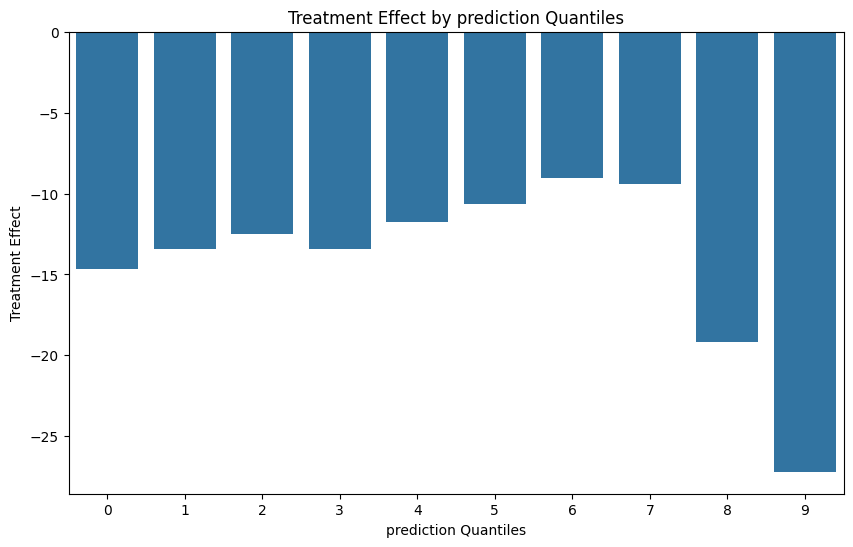

In [26]:
def effect_by_segment(df, column, treatment_column, outcome_column, n_quantiles=5):
    """
    Computes the treatment effect for quantile segments of a specific column.

    Args:
        df: The input DataFrame.
        column: The column to segment by.
        treatment_column: The name of the treatment column (binary).
        outcome_column: The name of the outcome column.
        n_quantiles: The number of quantiles to divide the data into.

    Returns:
        A DataFrame with the treatment effect for each segment.
    """

    # Create quantile segments
    df['quantile'] = pd.qcut(df[column], n_quantiles, labels=False)

    # Calculate treatment effect for each segment
    effects = []
    for i in range(n_quantiles):
        segment_data = df[df['quantile'] == i]
        effect = te(segment_data, treatment_column, outcome_column)
        effects.append(effect)

    result_df = pd.DataFrame({
        'Quantile': range(n_quantiles),
        'Treatment Effect': effects
    })

    # Plotting the treatment effect for each quantile.
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Quantile', y='Treatment Effect', data=result_df)
    plt.title(f'Treatment Effect by {column} Quantiles')
    plt.xlabel(f'{column} Quantiles')
    plt.ylabel('Treatment Effect')
    plt.show()

effect_by_segment(test_pred, 'prediction', 'binary_discount', 'profit', n_quantiles=10)

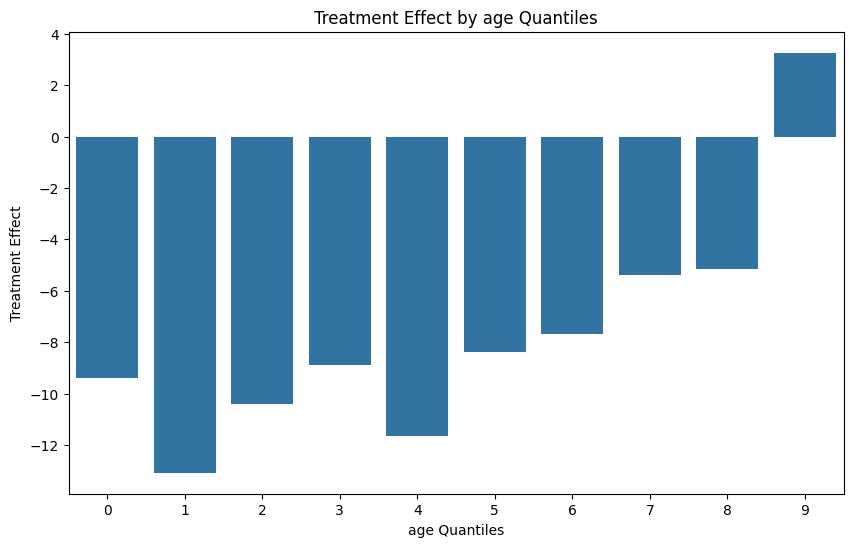

In [27]:
effect_by_segment(test_pred, 'age', 'binary_discount', 'profit', n_quantiles=10)

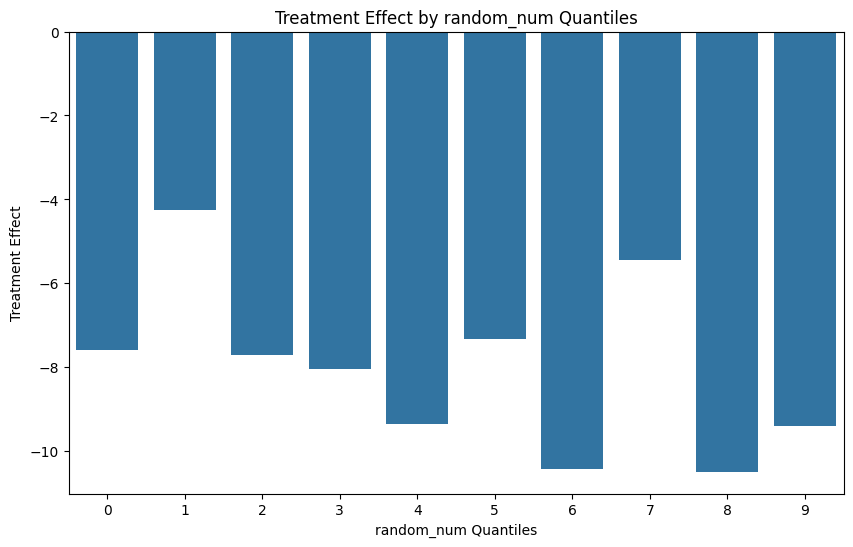

In [29]:
test_pred["random_num"] = np.random.uniform(0, 1, size=len(test_pred))
effect_by_segment(test_pred, 'random_num', 'binary_discount', 'profit', n_quantiles=10)

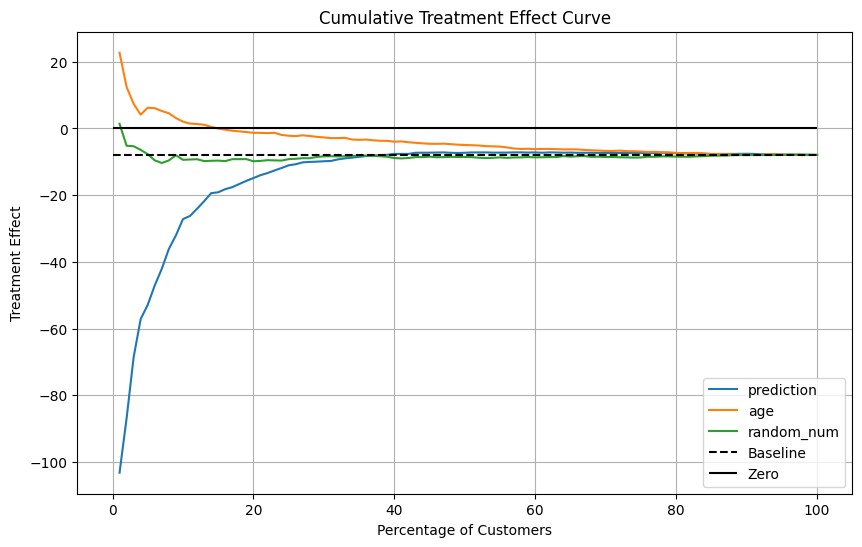

In [37]:
def cumulative_effect_curve(df, column, treatment_column, outcome_column):
    """
    Generates a cumulative treatment effect curve.

    Args:
        df: The input DataFrame.
        column: The column to order by.
        treatment_column: The name of the treatment column (binary).
        outcome_column: The name of the outcome column.
    """

    # Order the DataFrame
    sorted_df = df.sort_values(column, ascending=False)

    # Initialize lists to store cumulative treatment effects
    cumulative_effects = []
    percentages = []

    for i in range(1, 101):
        n_customers = int(len(sorted_df) * (i / 100))
        current_slice = sorted_df.head(n_customers)

        # Calculate treatment effect for the current slice
        effect = te(current_slice, treatment_column, outcome_column)

        cumulative_effects.append(effect)
        percentages.append(i)

    return cumulative_effects, percentages


ce_pred, per_pred = cumulative_effect_curve(test_pred, 'prediction', 'binary_discount', 'profit')
ce_age, per_age = cumulative_effect_curve(test_pred, 'age', 'binary_discount', 'profit')
ce_rnd, per_rnd = cumulative_effect_curve(test_pred, 'random_num', 'binary_discount', 'profit')

# Plotting the cumulative effect curve
plt.figure(figsize=(10, 6))
plt.plot(per_pred, ce_pred, label="prediction")
plt.plot(per_age, ce_age, label="age")
plt.plot(per_rnd, ce_rnd, label="random_num")
plt.hlines(ate, 0, 100, linestyle="--", color="black", label="Baseline")
plt.hlines(0, 0, 100, linestyle="solid", color="black", label="Zero")
plt.xlabel("Percentage of Customers")
plt.ylabel("Treatment Effect")
plt.title(f"Cumulative Treatment Effect Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

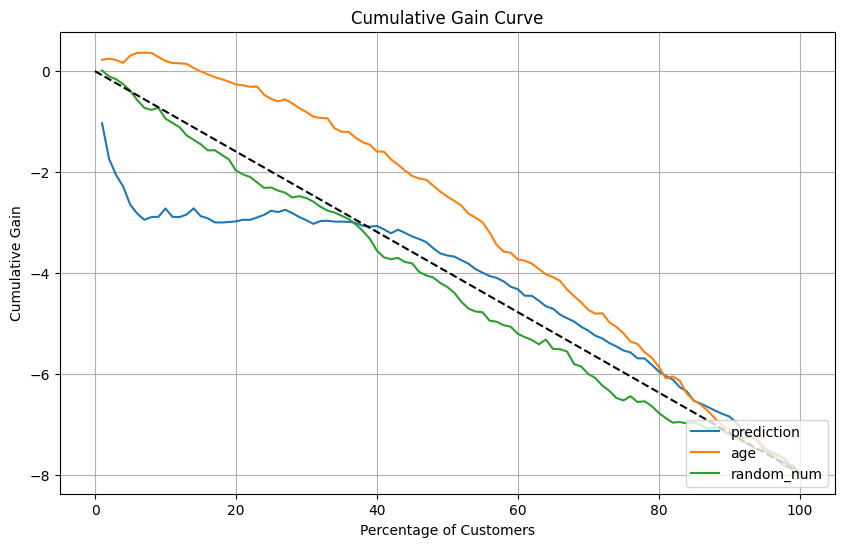

In [39]:
def cumulative_gain(df, column, treatment_column, outcome_column):
    """
    Generates a cumulative gain curve.

    Args:
        df: The input DataFrame.
        column: The column to order by.
        treatment_column: The name of the treatment column (binary).
        outcome_column: The name of the outcome column.
    """

    # Order the DataFrame
    sorted_df = df.sort_values(column, ascending=False)

    # Initialize lists to store cumulative treatment effects
    cumulative_gains = []
    percentages = []

    for i in range(1, 101):
        n_customers = int(len(sorted_df) * (i / 100))
        current_slice = sorted_df.head(n_customers)

        # Calculate treatment effect for the current slice
        effect = te(current_slice, treatment_column, outcome_column)

        # Cumulative gain calculation
        cumulative_gain = effect * (i/100)
        cumulative_gains.append(cumulative_gain)
        percentages.append(i)

    return cumulative_gains, percentages

cg_pred, per_pred = cumulative_gain(test_pred, 'prediction', 'binary_discount', 'profit')
cg_age, per_age = cumulative_gain(test_pred, 'age', 'binary_discount', 'profit')
cg_rnd, per_rnd = cumulative_gain(test_pred, 'random_num', 'binary_discount', 'profit')

# Plotting the cumulative gain curve
plt.figure(figsize=(10, 6))
plt.plot(per_pred, cg_pred, label="prediction")
plt.plot(per_age, cg_age, label="age")
plt.plot(per_rnd, cg_rnd, label="random_num")
plt.plot([0, 100], [0, ate], linestyle="--", color="black")
plt.xlabel("Percentage of Customers")
plt.ylabel("Cumulative Gain")
plt.title(f"Cumulative Gain Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

All the above curves tells a similar story. We can clearly see that personalising by age is a much better idea than personalising by a ML model that predicts sales or the random model fluctuates around the baseline.

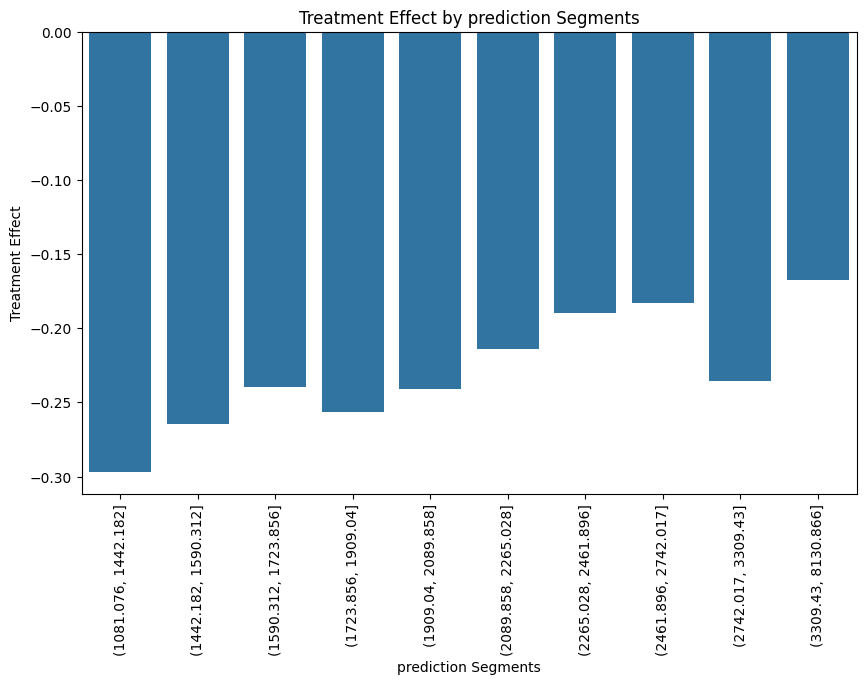

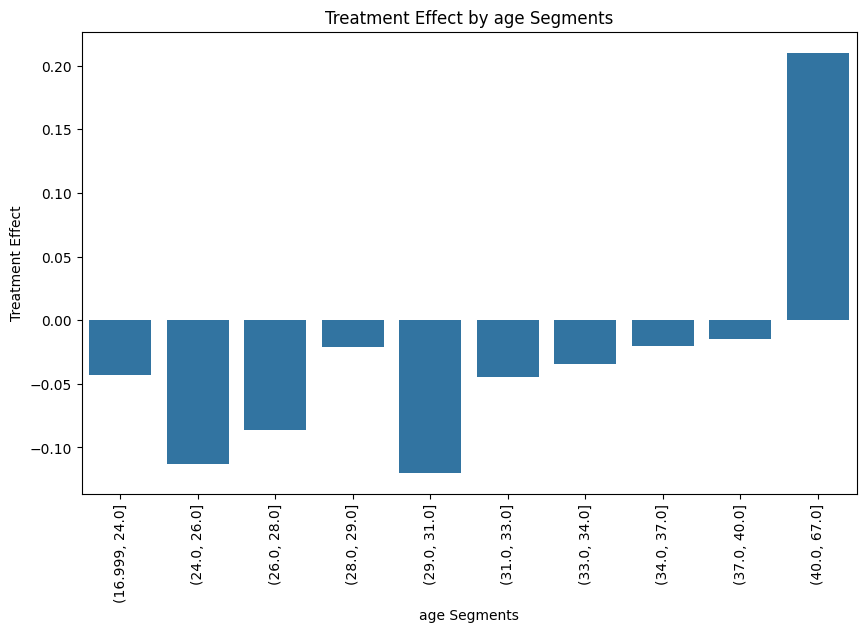

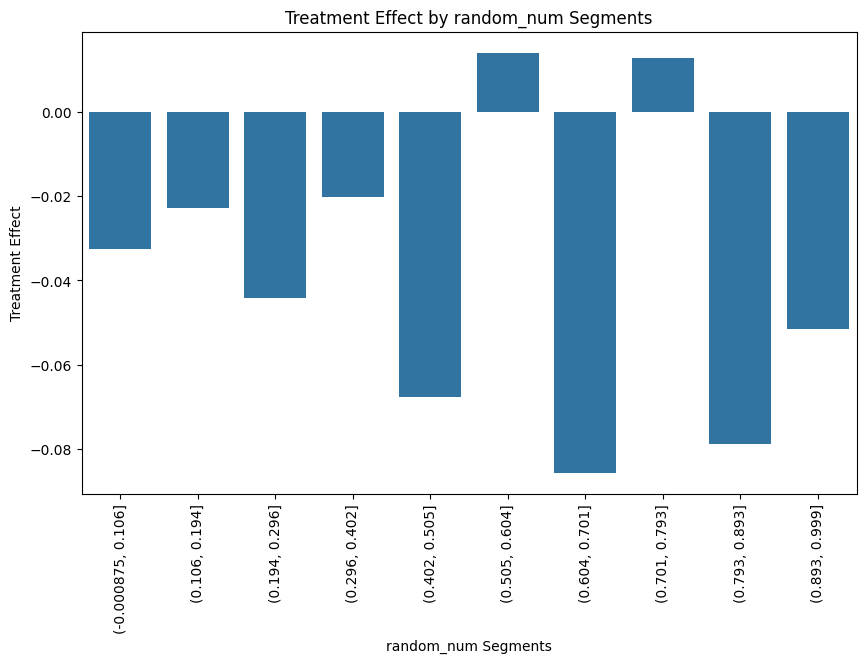

In [76]:
def elast_by_segment(df, column, treatment_column, outcome_column, n_segments=10):
    """
    Computes the treatment effect (slope of the regression line) by segments of a specific column.

    Args:
        df: The input DataFrame.
        column: The column to segment by.
        treatment_column: The name of the treatment column.
        outcome_column: The name of the outcome column.
        n_segments: The number of segments to divide the data into.

    Returns:
        A DataFrame with the treatment effect for each segment.
    """
    df['segment'] = pd.qcut(df[column], n_segments)
    segments = list(df['segment'].unique().categories)
    effects = []
    for i in segments:
        segment_data = df[df['segment'] == i]
        effects.append(elast(segment_data, treatment_column, outcome_column))

    result_df = pd.DataFrame({
        'Segment': list(df['segment'].unique().categories),
        'Treatment Effect': effects
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Segment', y='Treatment Effect', data=result_df)
    plt.title(f'Treatment Effect by {column} Segments')
    plt.xlabel(f'{column} Segments')
    plt.xticks(rotation=90)
    plt.ylabel('Treatment Effect')
    plt.show()

elast_by_segment(test_pred, 'prediction', 'discount', 'profit', n_segments=10)
elast_by_segment(test_pred, 'age', 'discount', 'profit', n_segments=10)
elast_by_segment(test_pred, 'random_num', 'discount', 'profit', n_segments=10)

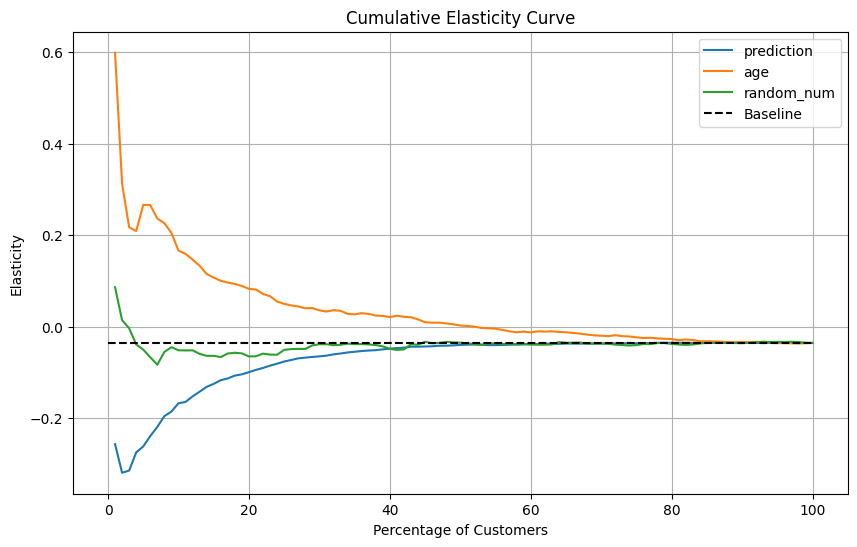

In [61]:
def cumulative_elast_curve(df, column, treatment_column, outcome_column):
    """
    Generates a cumulative elasticity curve.

    Args:
        df: The input DataFrame.
        column: The column to order by.
        treatment_column: The name of the treatment column.
        outcome_column: The name of the outcome column.
    """

    # Order the DataFrame
    sorted_df = df.sort_values(column, ascending=False)

    # Initialize lists to store cumulative elasticities
    cumulative_elast = []
    percentages = []

    for i in range(1, 101):
        n_customers = int(len(sorted_df) * (i / 100))
        current_slice = sorted_df.head(n_customers)

        # Calculate elasticity for the current slice
        elast_val = elast(current_slice, treatment_column, outcome_column)

        cumulative_elast.append(elast_val)
        percentages.append(i)

    return cumulative_elast, percentages

# Calculate cumulative elasticity curves
ce_pred, per_pred = cumulative_elast_curve(test_pred, 'prediction', 'discount', 'profit')
ce_age, per_age = cumulative_elast_curve(test_pred, 'age', 'discount', 'profit')
ce_rnd, per_rnd = cumulative_elast_curve(test_pred, 'random_num', 'discount', 'profit')

# Plotting the cumulative elasticity curves
plt.figure(figsize=(10, 6))
plt.plot(per_pred, ce_pred, label="prediction")
plt.plot(per_age, ce_age, label="age")
plt.plot(per_rnd, ce_rnd, label="random_num")
plt.hlines(elast(test_pred, "discount", "profit"), 0, 100, linestyle="--", color="black", label="Baseline")
plt.xlabel("Percentage of Customers")
plt.ylabel("Elasticity")
plt.title(f"Cumulative Elasticity Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

The cumulative elasticity curve tells a similar story from the one we've seen before. Ordering customers by sales prediction will only always yield treatment effects below the zero line. However, if we look by age, we can see that the top 40% older customers have a positive discount effect on profit. This tells us that simply segmenting customers by age and sending discounts to older customers is a better personalisation strategy than a complex ML model.

In the black dotted line, we can also see the average elasticity to see what would happen if we were to not segment at all. Since this line is below zero, it means that, on average, without personalising, discounts are not profitable. Also, notice how the random segmentation fluctuates around the ATE, as expected.

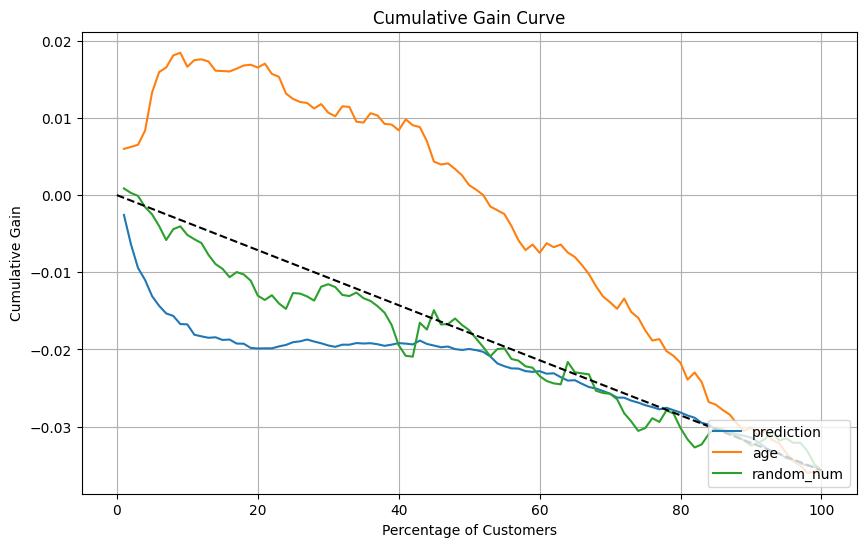

In [65]:
def cumulative_gain(df, column, treatment_column, outcome_column):
    """
    Generates a cumulative gain curve.

    Args:
        df: The input DataFrame.
        column: The column to order by.
        treatment_column: The name of the treatment column (binary).
        outcome_column: The name of the outcome column.
    """

    # Order the DataFrame
    sorted_df = df.sort_values(column, ascending=False)

    # Initialize lists to store cumulative treatment effects
    cumulative_gains = []
    percentages = []

    for i in range(1, 101):
        n_customers = int(len(sorted_df) * (i / 100))
        current_slice = sorted_df.head(n_customers)

        # Calculate treatment effect for the current slice
        effect = elast(current_slice, treatment_column, outcome_column)

        # Cumulative gain calculation
        cumulative_gain = effect * (i/100)
        cumulative_gains.append(cumulative_gain)
        percentages.append(i)

    return cumulative_gains, percentages

cg_pred, per_pred = cumulative_gain(test_pred, 'prediction', 'discount', 'profit')
cg_age, per_age = cumulative_gain(test_pred, 'age', 'discount', 'profit')
cg_rnd, per_rnd = cumulative_gain(test_pred, 'random_num', 'discount', 'profit')

# Plotting the cumulative gain curve
plt.figure(figsize=(10, 6))
plt.plot(per_pred, cg_pred, label="prediction")
plt.plot(per_age, cg_age, label="age")
plt.plot(per_rnd, cg_rnd, label="random_num")
plt.plot([0, 100], [0, elast(test_pred, "discount", "profit")], linestyle="--", color="black")
plt.xlabel("Percentage of Customers")
plt.ylabel("Cumulative Gain")
plt.title(f"Cumulative Gain Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [78]:
# Fit a linear regression model with interactions
model_interaction = smf.ols('profit ~ discount * (tenure + age + C(cust_state))', data=train).fit()

# Print the model summary
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     80.61
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:39:28   Log-Likelihood:                -66534.
No. Observations:               15000   AIC:                         1.332e+05
Df Residuals:                   14942   BIC:                         1.336e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [79]:
# Predict profit with original discounts
predictions_original = model_interaction.predict(test)

test_modified = test.copy()
# Subtract 1 from the discount column
test_modified['discount'] = test_modified['discount'] - 1
predictions_modified = model_interaction.predict(test_modified)

# Calculate the treatment effect
test_modified["treatment_effect"] = predictions_original - predictions_modified

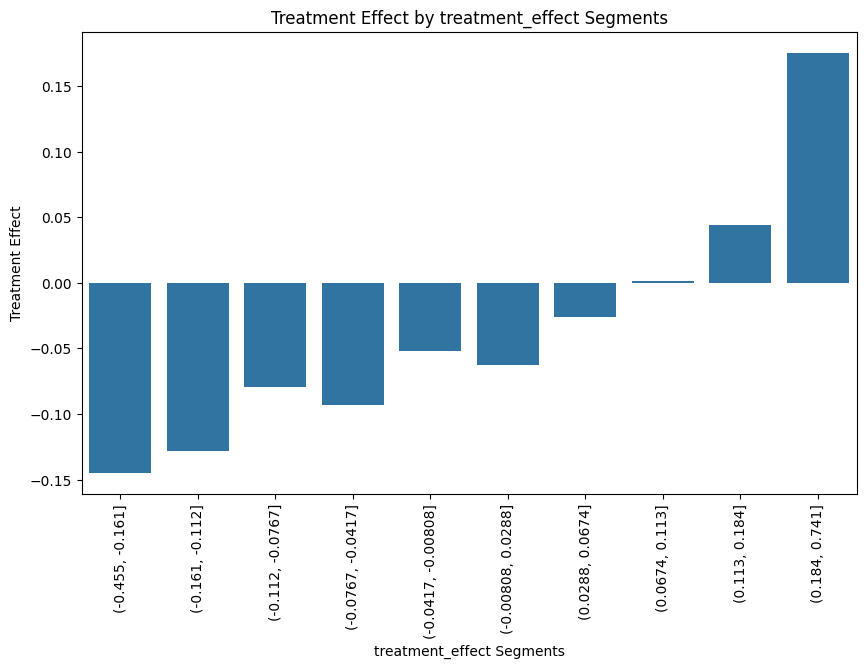

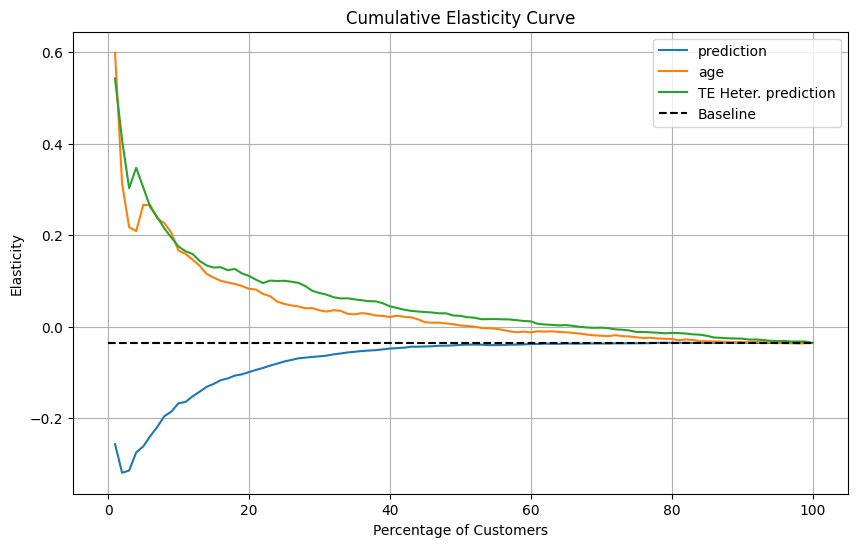

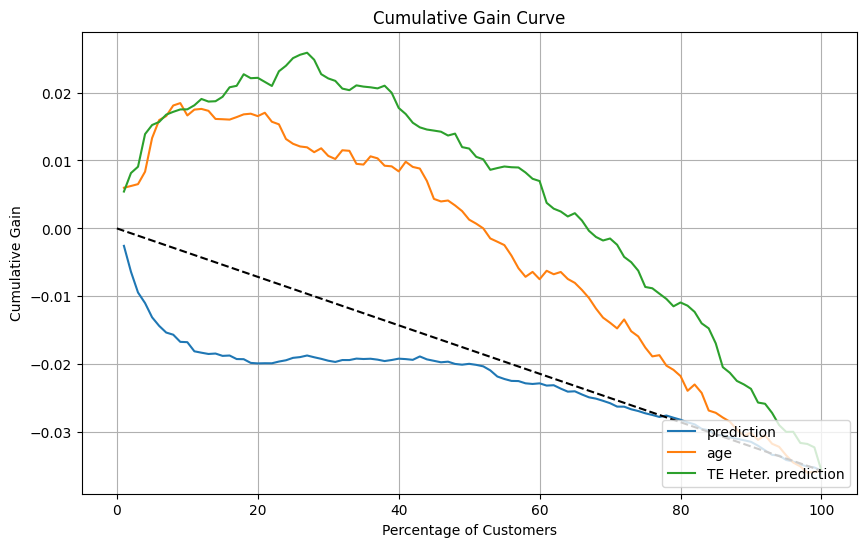

In [84]:
# Plotting the elasticity by segment for TE prediction
elast_by_segment(test_modified, 'treatment_effect', 'discount', 'profit', n_segments=10)

# Plotting the cumulative elasticity curve for age and TE prediction
ce_hte, per_hte = cumulative_elast_curve(test_modified, 'treatment_effect', 'discount', 'profit')
ce_age, per_age = cumulative_elast_curve(test_pred, 'age', 'discount', 'profit')
ce_pred, per_pred = cumulative_elast_curve(test_pred, 'prediction', 'discount', 'profit')


plt.figure(figsize=(10, 6))
plt.plot(per_pred, ce_pred, label="prediction")
plt.plot(per_age, ce_age, label="age")
plt.plot(per_hte, ce_hte, label="TE Heter. prediction")
plt.hlines(elast(test_pred, "discount", "profit"), 0, 100, linestyle="--", color="black", label="Baseline")
plt.xlabel("Percentage of Customers")
plt.ylabel("Elasticity")
plt.title(f"Cumulative Elasticity Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# Plotting the cumulative gain curve for age and TE prediction
cg_pred, per_pred = cumulative_gain(test_pred, 'prediction', 'discount', 'profit')
cg_age, per_age = cumulative_gain(test_pred, 'age', 'discount', 'profit')
cg_hte, per_hte = cumulative_gain(test_modified, 'treatment_effect', 'discount', 'profit')

plt.figure(figsize=(10, 6))
plt.plot(per_pred, cg_pred, label="prediction")
plt.plot(per_age, cg_age, label="age")
plt.plot(per_hte, cg_hte, label="TE Heter. prediction")
plt.plot([0, 100], [0, elast(test_pred, "discount", "profit")], linestyle="--", color="black")
plt.xlabel("Percentage of Customers")
plt.ylabel("Cumulative Gain")
plt.title(f"Cumulative Gain Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The Elasticity or TE by Band plots shows that the model orders the treatment effect nicely, even in a dataset which it didn't see during the fitting process. As we can see, customers with high TE prediction indeed have high TE in the data where discount was randomized. Also, customers with low TE prediction have, indeed, low TE.

The cumulative elasticity curve shows that our TE model starts further from the ATE and converges slowlier to it. This means that the model is better at distinguishing customers with high TE from those with low TE. It's better than simply using Age, but not by much. The cumulative gain plot shows a similar picture, with our model coming on top once again.

**Recommendation**: Based on the plot of Treatment Effect by Band, it makes sense to treat everyone with treatment effect predictions above 0.067. We could also choose to treat everyone with treatment effect prediction above zero, if we really trust our scores.